## IS620 week 8 - NLTK High Frequency Words
Daina Bouquin

Perform an analysis of high frequency words in a corpus of interest.

Complete the following tasks:

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection u'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/dainabouquin/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/dainabouquin/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/dainabouquin/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/dainabouquin/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/dainabouquin/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/dainabouquin/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Dow

True

In [8]:
# make sure it's all set :)
nltk.word_tokenize("hello world")

['hello', 'world']

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns

### Choose Corpus and Find Unique Words

I chose the Emma corpus from the nltk package. I am going to define unique words as the set of distinct alphabetic strings in the corpus, and I will remove common stop words such as 'a' and 'the'. This will also remove numbers and punctuation from the corpus. The length of the set is taken to survey the number of unique words.

In [16]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

# strip punctuation and numerics using isalpha() method
emma = [w for w in emma if w.isalpha()]
# strip out stop words
from nltk.corpus import stopwords
emma = [w for w in emma if w not in stopwords.words('english')]

In [17]:
# How many total unique words are in the corpus
emma_unique = set(emma)
len(emma_unique)

7406

### Most Common Words and building a Frequency Distribution

Here we build a frequency distribution from the corpus and isolate the 200 most common words. This method returns the a sort list of tuples that is then loaded into a dataframe in order to calculate relative frequencies.



In [39]:
# build the frequency distribution using FreqDist()
freq_emma = nltk.FreqDist(emma)

# make a dataframe to produce relative frequencies - top 200
emma_top200 = pd.DataFrame(freq_emma.most_common(200),columns=['word','count'])
emma_top200['rel_freq'] = emma_top['count']/float(len(emma))
emma_top200.head(10)

,word,count,rel_freq
0,I,3178,0.039032
1,Mr,1153,0.014161
2,Emma,865,0.010624
3,could,825,0.010133
4,would,815,0.010010
5,Mrs,699,0.008585
6,Miss,592,0.007271
7,must,564,0.006927
8,She,562,0.006902
9,Harriet,506,0.006215


We want to find out the number of most common unique words that make up approximately 50% of the dataset. By plotting the cumulative distribution we can see that approximately 250 words accounts for 50% of all words in the dataset. This is confirmed by summing the first 250 indexes of relative frequencies.

In [40]:
# top 500
emma_top500 = pd.DataFrame(freq_emma.most_common(500),columns=['word','count'])
emma_top500['rel_freq'] = emma_top['count']/float(len(emma))

In [19]:
len(emma)/2.0   ## half of all words

40710.5

In [41]:
sum(emma_top500[:250]['rel_freq']) # The first 250 words account for approximately half of all words

0.51471978973483457

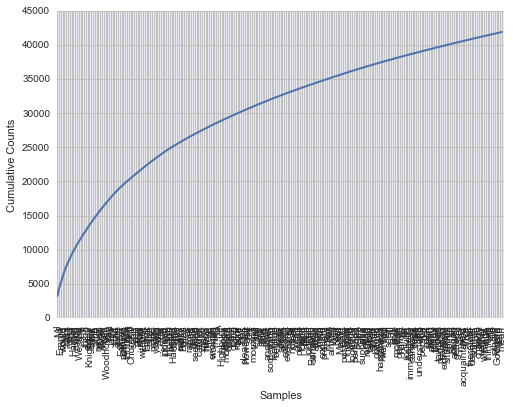

In [42]:
freq_emma.plot(250, cumulative=True) 

The following barplot shows the relative frequencies of all 200 of the most frequent unique words.

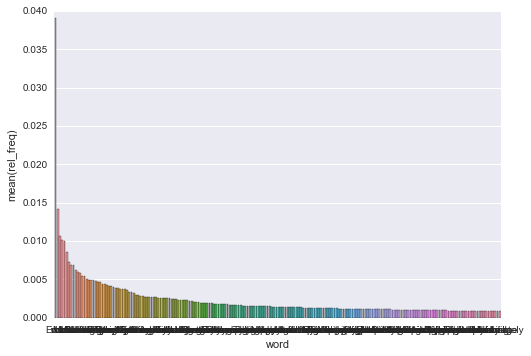

In [43]:
g = sns.barplot(x=emma_top200.word, y=emma_top200.rel_freq)

The observed relative frequencies do follow Zipf's Law, in that the frequency of any word is approximately inversely proportional to its ranking in the frequency table.  This law holds for all words in all corpora. The only differences are the words themselves-- they differ based on the content of the corpus being analyzed.